# Homework 2

Homework 2 is due on Monday, February 3.

## Written Part

**Problem 1:** Consider an $m\times n$ matrix $X$, an $m$-component vector $y$, and an $n$-component vector $\theta$. Suppose the matrix $X$ is tall and skinny, that is, suppose $m>n$. We saw in class the the gradient of the MSE cost function is proportional to $X^TX\theta-X^Ty = X^T(X\theta-y)$. This quantity can be computed two different ways: 

**Way 1:**
1. Compute the matrix product $X^TX$
2. Compute the matrix-vector product $(X^TX)\theta$
3. Compute the matrix-vector product $X^Ty$
4. Subtract the vector $X^Ty$ from the vector $(X^TX)\theta$

**Way 2:**
1. Compute the matrix-vector product $X\theta$
2. Subtract the vector $y$ from the vector $X\theta$
3. Compute the matrix-vector product $ X^T(X\theta-y)$

What would be the most efficient way in terms of operations (multiplications, additions, and subtractions) of computing it?


**Answer:**

Way 2 is the most efficient way to compute the gradient. Way 2 has no matrix products which is a cubic at best operation. Way 2 has only matrix-vector products which are not as significant as matrix products.

**Problem 2 (for M462 students):** Consider the function $f(x)=x^TMx$, where $x$ is a vector, and $M$ is an $n\times n$ matrix (possibly non-symmetric). Find the gradient of $f(x)$. 

**Answer:**

$ f(x)= x^TMx$

$ \frac{\partial f}{\partial x_{i}} = [\begin{bmatrix}0&\cdots&0&1&0&\cdots&0\end{bmatrix}Mx + x^T0x + x^TM\begin{bmatrix}0\\\vdots\\0\\1\\0\\\vdots\\0\end{bmatrix}$

$ \frac{\partial f}{\partial x_{i}} = \begin{bmatrix} \text{row i of M} \end{bmatrix}x + x^T\begin{bmatrix}\text{col}\\\text{i}\\\text{of}\\\text{M}\end{bmatrix}$


$ \frac{\partial f}{\partial x_{i}} = Mx + M^Tx$

**Problem 2 (for M562 students):** Consider two convex functions $f(x)$ and $g(x)$. Assume $g(x)$ is non-decresing. Show that the composite function $h(x)=g(f(x))$ is also convex.

**Problem 3:** Consider the MSE cost function $\mbox{MSE}(\theta)=\|y-X\theta\|_2^2$. Find the second-order partial derivatives matrix (the *Hessian matrix*)

$$
\begin{bmatrix}
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1^2} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial\theta_n} \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2^2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial\theta_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial\theta_n^2}
\end{bmatrix}
$$

**Answer:**

$$
\begin{bmatrix}
\dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_n - y)) \\
\dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_n - y)) \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{2}{m}X^T((X\theta_n - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_n - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_n - y)(X\theta_n - y)) 
\end{bmatrix}
$$

**Cancels down to:**

$ 2(X^TX)_{ij}$

## Programming Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


After Gradient Descent


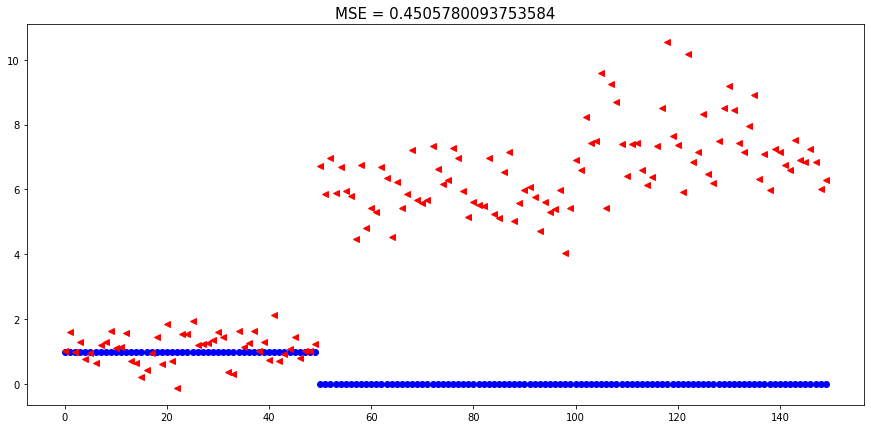

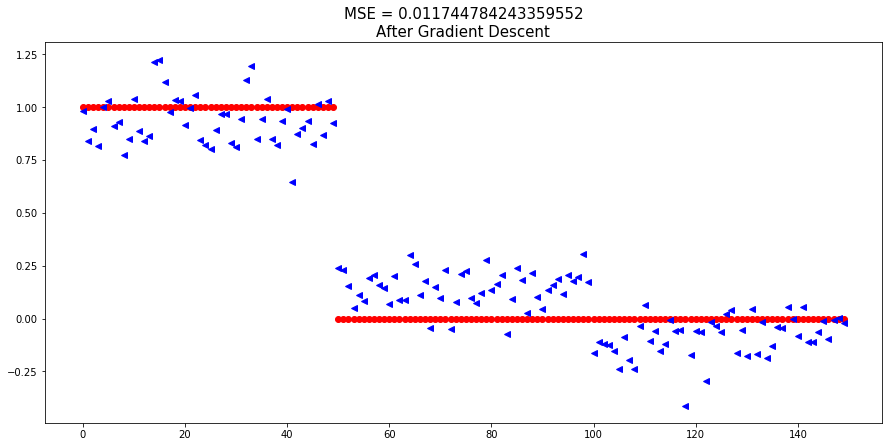

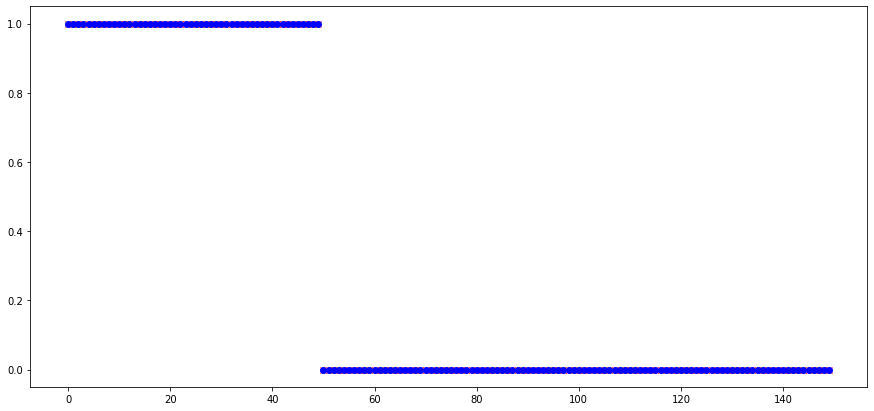

In [14]:




rule = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0}
iris_data['target'] = iris_data['species'].map(rule)

'Part 2: Use Gradient Descent to train a linear model for predicting the target values.'

y = iris_data['target'].to_numpy()
y = y[:,None]
m = len(iris_data)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris_data[features].to_numpy()
X.shape

s = .01
theta = np.random.randn(4,1)

MSE = np.linalg.norm(X@theta - y)/m

plt.figure(figsize=(15,7))
#plt.plot(x,y,'rx')

y_predicted = X@theta

plt.plot(y, 'bo')
plt.plot(y_predicted,'r<')
plt.title('MSE = ' + str(MSE), fontsize=15)

X.shape

y[:,None].shape

'Gradient Descent Step'
for i in range(10000):
    gradient = (2/m)*X.T@(X@theta-y)
    theta = theta - s*gradient

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
#plt.plot(x,y,'rx')

y_predicted = X@theta

print("After Gradient Descent")

plt.plot(y,'ro')
plt.plot(y_predicted,'b<')

plt.title('MSE = ' + str(MSE) + '\nAfter Gradient Descent', fontsize=15)

def predictor(y,p):
    n = len(y)
    yy = np.zeros((n,1))
    yy[y>=p]= 1
    return yy
p=0.5
plt.figure(figsize=(15,7))
predict = predictor(y_predicted,p)
plt.plot(y,'rx')
plt.plot(predict, 'bo')



# Stochastic Gradient Descent Homework 3

In [ ]:
s = .01
theta = np.random.randn(4,1)

MSE = np.linalg.norm(X@theta - y)/m

plt.figure(figsize=(15,7))
#plt.plot(x,y,'rx')

y_predicted = X@theta

plt.plot(y, 'ro')
plt.plot(y_predicted,'b<')
plt.title('MSE = ' + str(MSE), fontsize=15)



In [ ]:
'Stochastic Gradient Descent (SGD)'
m,n = X.shape
n_iterations = 1000 #number of SGD steps
theta = np.random.rand(n,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step
s = 0.1 #learning rate

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[random_row] #ith row; 
    xi = xi[None,:] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
y_predicted = X@theta
    
    
plt.plot(MSE,'r-')


In [1]:

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(y_predicted, 'r<')



NameError: name 'plt' is not defined